In [5]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from utils import *

In [35]:
cf4_df = read_csv('cosmicflow.csv')
save_csv(cf4_df.iloc[:10], 'cosmicflow_fof.csv', overwrite=True)


In [44]:
# FoF pass
X = cf4_df
index = np.random.choice(X.index, len(X), replace=False)
X.loc[index]
for r in X.iterrows():


[37291 13246  4454 ... 11711 39332 40429]


,x,y,z,w,ra,dec,redshift,dist
37291,53.52,157.15,130.32,37.999,232.4239,44.8304,NaN,211.054060
13246,21.03,14.58,39.52,33.353,277.0197,48.1617,NaN,47.081500
4454,18.29,44.08,-78.70,35.403,123.8710,8.3451,NaN,92.039450
36635,69.76,265.34,45.98,38.519,192.4657,42.0587,NaN,278.183300
19778,-41.13,-10.18,-25.12,36.019,139.0942,-71.1491,NaN,49.257730
...,...,...,...,...,...,...,...,...
50692,-19.35,151.93,48.22,37.319,206.5256,22.5302,NaN,160.568730
21502,-14.16,-53.13,58.30,36.709,315.7835,-13.8611,NaN,80.138580
11711,-0.85,216.57,166.99,33.059,228.5173,30.1464,NaN,273.475680
39332,73.04,57.40,-28.65,37.359,123.6150,55.1791,NaN,97.213295


In [63]:
stats = pd.concat([cf4_df.max(), cf4_df.min(), cf4_df.std(), cf4_df.mean()], axis=1)
stats.columns = ['max', 'min', 'std', 'mean']
stats

,max,min,std,mean
x,226.2800,-223.9500,62.333418,4.898025
y,287.6300,-242.3300,96.671651,93.029230
z,268.0900,-269.6000,83.671305,4.502106
w,39.6490,18.4690,1.778639,36.191395
ra,359.9976,0.0070,72.151902,181.423980
dec,88.1368,-89.3346,29.293424,14.212146
redshift,NaN,NaN,NaN,NaN
dist,289.4550,0.0000,78.985235,150.637063


In [135]:
n = 100
X = pd.concat([cf4_df.x, cf4_df.y, cf4_df.z], axis=1)
index = np.random.choice(X.index, n, replace=False)
X = X.iloc[index]
X.m = 1

In [ ]:
# Agglomerative clustering
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

# Z = linkage(pdist(X), method='single')
# labels = fcluster(Z, t=3, criterion='maxclust')
# clustering = AgglomerativeClustering(n_clusters=5).fit(X)


In [112]:
from sklearn.cluster import MiniBatchKMeans
clustering = MiniBatchKMeans().fit(X)
labels = clustering.labels_

/opt/homebrew/Caskroom/miniforge/base/envs/map412/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [110]:
from sklearn.cluster import OPTICS

model = OPTICS(min_samples=5)
labels = model.fit_predict(X)

In [134]:
# Energy clustering
def calculate_energy(X, X0, c0, c1):
    E = 0
    for i in range(len(X)):
        Xi = X.iloc[i]
        X0i = X0.iloc[i]

        E_grav = -c0 * np.sum(X.m / np.abs(X.r - Xi.r))
        E_penalty = c1 * ((Xi.r - X0i.r) / Xi.sigma)**2
        E += E_grav + E_penalty
    return E
calculate_energy(X, X, 1, 1)

AttributeError: 'DataFrame' object has no attribute 'r'

In [129]:
X

,x,y,z
35961,71.16,201.12,-34.13
23819,20.98,116.13,-228.24
8402,-20.19,134.88,-5.04
10994,-5.69,1.32,0.39
4144,-81.43,-32.81,-62.74
...,...,...,...
21075,-95.99,93.99,-9.65
31051,77.11,160.28,-140.76
25851,36.12,129.61,-189.82
25305,-72.41,195.40,12.42


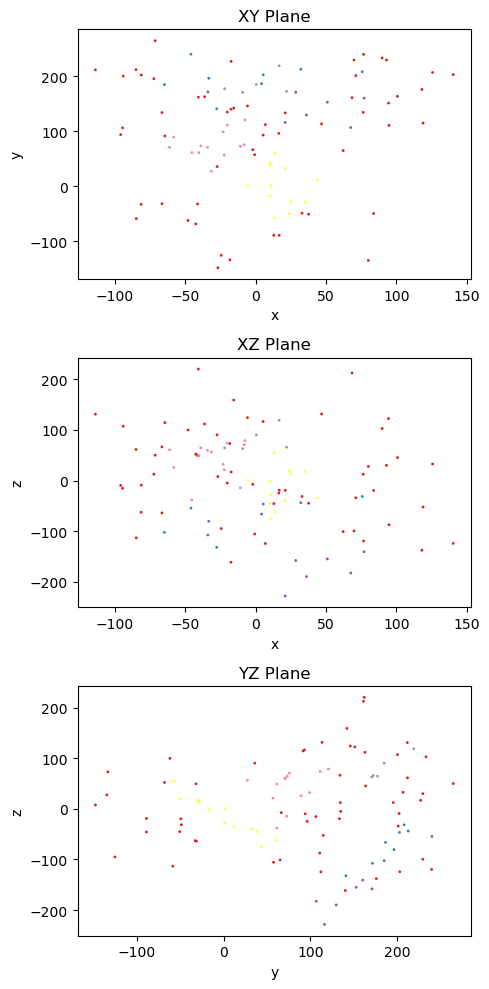

In [111]:
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

axs[0].scatter(X.x, X.y, s=1, c=labels, cmap='Set1')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('XY Plane')

axs[1].scatter(X.x, X.z, s=1, c=labels, cmap='Set1')
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].set_title('XZ Plane')

axs[2].scatter(X.y, X.z, s=1, c=labels, cmap='Set1')
axs[2].set_xlabel('y')
axs[2].set_ylabel('z')
axs[2].set_title('YZ Plane')

plt.tight_layout()

In [136]:
# FoF (Olivier's method)
def fof_transform(X):
    X


,x,y,z
9778,-2.83,29.85,6.60
37178,65.61,183.04,2.44
11388,48.80,86.35,55.48
49663,-21.54,128.09,-15.36
6982,-10.25,11.04,-7.79
...,...,...,...
50542,-93.27,247.11,46.36
20035,-84.52,-53.98,-113.50
50231,31.70,154.23,29.89
3313,57.65,17.43,-4.94


In [ ]:
#